I record the row_cluster order in plot function order to make each picture's row order consistent.

In [81]:
'''---Import Package---'''
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import sys
sys.path.append('/Users/ccy/Documents/NTU/大四上/NSCLC-tumor-data-analysis')
import config

## Plot Function

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import scanpy as sc
import squidpy as sq
from matplotlib.pyplot import gcf
import matplotlib.patches as mpatches

#### Data visualization in the beginning

In [83]:
def plot_histogram(data, save_dir):
    data.hist(bins=15, figsize=(20,15))
    plt.suptitle("Histogram of cell type")
    plt.savefig(save_dir)
    
def plot_boxplot(data, save_dir):
    plt.figure(figsize=(20,15))
    sns.boxplot(data, orient='h')
    plt.suptitle("Boxplot of cell type")
    plt.savefig(save_dir)

#### Plot cluster map

In [ ]:
class Plot_Clustermap:
    
    def __init__(self):
        self.row_order = None
    
    def plot_clustermap(self, metric_df, row_colors, col_colors, save_dir):
    
        '''Plot Setting'''
        plt.style.use("seaborn-v0_8-whitegrid")
        plt.rcParams['font.family'] = 'Arial'
        plt.rcParams['axes.unicode_minus'] = False
        plt.rcParams['font.size'] = 15
        cmap = ListedColormap(sns.color_palette("RdBu_r",10))
        clustermap = sns.clustermap(metric_df, row_cluster=True, col_cluster=True, 
                                    method='weighted', cmap=cmap, figsize=(25,20),
                                    row_colors= row_colors, col_colors=col_colors, 
                                    metric='euclidean',linewidths=0.5, linecolor='black',
                                    dendrogram_ratio=0.1, colors_ratio=0.04)
        # Sort columns by the sum of values (or another criterion)
        # You can sort by the first component of the column cluster
        col_order = clustermap.dendrogram_col.reordered_ind
        col_order_sorted = sorted(col_order, key=lambda x: metric_df.iloc[:, x].sum())
        # Reorder columns in the heatmap
        clustermap.data2d = metric_df.iloc[:, col_order_sorted]
        
        # Replot the heatmap with reordered columns
        clustermap = sns.clustermap(clustermap.data2d, row_cluster=True, col_cluster=True, 
                                    cmap=cmap, figsize=(15, 10),
                                    row_colors=row_colors, col_colors=col_colors, 
                                    metric='euclidean', linewidths=0.5, linecolor='black',
                                    dendrogram_ratio=0.1, colors_ratio=0.04)
    
        self.row_order = clustermap.dendrogram_row.reordered_ind
        
        ''' Customize dendrogram lines '''
        for ax in [clustermap.ax_row_dendrogram, clustermap.ax_col_dendrogram]:
            for line in ax.collections:
                line.set_color('black')  # Change dendrogram line color
                line.set_linewidth(1)  # Change dendrogram line width 
        ''' Adjust cbar'''
        x0, _y0, _w, _h = clustermap.cbar_pos
        clustermap.ax_cbar.set_position([x0, _y0, 0.03, 0.1])
        ''' X, Y parameters'''
        clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xticklabels(), rotation=90, fontsize=19.5) #改heatmap的x軸文字大小
        clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_yticklabels(), rotation=0, fontsize=19.5) #改heatmap的y軸文字大小
        ''' Adjust col_colors and row_colors  '''#調整megadata的參數格子大小的話直接調整width和height后的數字 會變寬或是變窄
        current_ax_row_colors = clustermap.ax_row_colors.get_position()
        clustermap.ax_row_colors.set_position([current_ax_row_colors.x0, current_ax_row_colors.y0, current_ax_row_colors.width-0.02, current_ax_row_colors.height])
        current_ax_col_colors = clustermap.ax_col_colors.get_position()
        clustermap.ax_col_colors.set_position([current_ax_col_colors.x0, current_ax_col_colors.y0+0.02, current_ax_col_colors.width, current_ax_col_colors.height-0.02])
        ''' Adjust col_colors and row_colors label font size '''
        for label in clustermap.ax_row_colors.get_xticklabels():
            label.set_fontsize(20)
        for label in clustermap.ax_col_colors.get_yticklabels():
            label.set_fontsize(20)
        plt.savefig(save_dir, bbox_inches='tight', pad_inches=0.1)
    def plot_clustermap_left(self, metric_df, row_colors, col_colors, save_dir):
    
        '''Plot Setting'''
        plt.style.use("seaborn-v0_8-whitegrid")
        plt.rcParams['font.family'] = 'Arial'
        plt.rcParams['axes.unicode_minus'] = False
        plt.rcParams['font.size'] = 15
        cmap = ListedColormap(sns.color_palette("RdBu_r",10))
        #num_rows, num_cols = metric_df.shape
        figsize = (15, 10)  # Adjust figsize based on cell size
        clustermap = sns.clustermap(metric_df, row_cluster=False, col_cluster=True, 
                                    method='weighted', cmap=cmap, figsize=figsize,
                                    row_colors= row_colors, col_colors=col_colors, 
                                    metric='euclidean',linewidths=0.5, linecolor='black',
                                    dendrogram_ratio=0.1, colors_ratio=0.04)
        
        # Sort columns by the sum of values (or another criterion)
        # You can sort by the first component of the column cluster
        col_order = clustermap.dendrogram_col.reordered_ind
        col_order_sorted = sorted(col_order, key=lambda x: metric_df.iloc[:, x].sum())
        # Reorder columns in the heatmap
        clustermap.data2d = metric_df.iloc[:, col_order_sorted]
        # Reorder rows in the metric_df based on the stored row_order
        clustermap.data2d = metric_df.iloc[self.row_order, :]
        
        # Replot the heatmap with reordered columns
        clustermap = sns.clustermap(clustermap.data2d, row_cluster=False, col_cluster=True, 
                                    cmap=cmap, figsize=figsize,
                                    row_colors=row_colors, col_colors=col_colors, 
                                    metric='euclidean', linewidths=0.5, linecolor='black',
                                    dendrogram_ratio=0.1, colors_ratio=0.04)
        ''' Customize dendrogram lines '''
        for ax in [clustermap.ax_row_dendrogram, clustermap.ax_col_dendrogram]:
            for line in ax.collections:
                line.set_color('black')  # Change dendrogram line color
                line.set_linewidth(1)  # Change dendrogram line width 
        ''' Adjust cbar'''
        x0, _y0, _w, _h = clustermap.cbar_pos
        clustermap.ax_cbar.set_position([x0, _y0, 0.03, 0.1])
        ''' X, Y parameters'''
        clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xticklabels(), rotation=90, fontsize=15) #改heatmap的x軸文字大小
        clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_yticklabels(), rotation=0, fontsize=15) #改heatmap的y軸文字大小
        ''' Adjust col_colors and row_colors  '''#調整megadata的參數格子大小的話直接調整width和height后的數字 會變寬或是變窄
        current_ax_row_colors = clustermap.ax_row_colors.get_position()
        clustermap.ax_row_colors.set_position([current_ax_row_colors.x0, current_ax_row_colors.y0, current_ax_row_colors.width-0.02, current_ax_row_colors.height])
        current_ax_col_colors = clustermap.ax_col_colors.get_position()
        clustermap.ax_col_colors.set_position([current_ax_col_colors.x0, current_ax_col_colors.y0+0.02, current_ax_col_colors.width, current_ax_col_colors.height-0.02])
        
        clustermap.ax_col_colors.set_yticklabels([]) 
            
        plt.savefig(save_dir, bbox_inches='tight')
        
    def plot_clustermap_right(self, metric_df, row_colors, col_colors, save_dir):
    
        '''Plot Setting'''
        plt.style.use("seaborn-v0_8-whitegrid")
        plt.rcParams['font.family'] = 'Arial'
        plt.rcParams['axes.unicode_minus'] = False
        plt.rcParams['font.size'] = 15
        cmap = ListedColormap(sns.color_palette("RdBu_r",10))
        
        #num_rows, num_cols = metric_df.shape        
        figsize = (15, 10)  # Adjust figsize based on cell size
    

        clustermap = sns.clustermap(metric_df, row_cluster=False, col_cluster=True, 
                                    method='weighted', cmap=cmap, figsize=figsize,
                                    row_colors=None, col_colors=col_colors, 
                                    metric='euclidean',linewidths=0.5, linecolor='black',
                                    dendrogram_ratio=(0, 0.1), colors_ratio=0.04, cbar_pos=None)
        
        # Sort columns by the sum of values (or another criterion)
        # You can sort by the first component of the column cluster
        col_order = clustermap.dendrogram_col.reordered_ind
        col_order_sorted = sorted(col_order, key=lambda x: metric_df.iloc[:, x].sum())
        # Reorder columns in the heatmap
        clustermap.data2d = metric_df.iloc[:, col_order_sorted]
        # Reorder rows in the metric_df based on the stored row_order
        clustermap.data2d = metric_df.iloc[self.row_order, :]
        # Replot the heatmap with reordered columns
        clustermap = sns.clustermap(clustermap.data2d, row_cluster=False, col_cluster=True, 
                                    cmap=cmap, figsize=figsize,
                                    row_colors=None, col_colors=col_colors, 
                                    metric='euclidean', linewidths=0.5, linecolor='black',
                                    dendrogram_ratio=(0, 0.1), colors_ratio=0.04, cbar_pos=None)

        ''' Customize dendrogram lines '''
        for ax in [clustermap.ax_row_dendrogram, clustermap.ax_col_dendrogram]:
            for line in ax.collections:
                line.set_color('black')  # Change dendrogram line color
                line.set_linewidth(1)  # Change dendrogram line width 

        ''' X, Y parameters'''
        clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xticklabels(), rotation=90, fontsize=20) #改heatmap的x軸文字大小
        clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_yticklabels(), rotation=0, fontsize=20) #改heatmap的y軸文字大小

        ''' Adjust col_colors and row_colors  '''#調整megadata的參數格子大小的話直接調整width和height后的數字 會變寬或是變窄
        current_ax_col_colors = clustermap.ax_col_colors.get_position()
        clustermap.ax_col_colors.set_position([current_ax_col_colors.x0, current_ax_col_colors.y0+0.02, current_ax_col_colors.width, current_ax_col_colors.height-0.02])

        ''' Adjust col_colors and row_colors label font size '''
        for label in clustermap.ax_col_colors.get_yticklabels():
            label.set_fontsize(20)

        plt.savefig(save_dir, bbox_inches='tight')

        
    def plot_combined(self, picture_left, picture_right, save_dir):
        
        picture_left = plt.imread(picture_left)
        picture_right = plt.imread(picture_right)
        
        figure, ax = plt.subplots(1,2,figsize=(30,10))
        ax[0].imshow(picture_left)
        ax[0].axis("off")
        ax[1].imshow(picture_right)
        ax[1].axis("off")
        plt.subplots_adjust(wspace=0.0001)  # Adjust spacing between subplots
        plt.savefig(save_dir, format='png', bbox_inches='tight', pad_inches=0.1)
        
        
def plot_legend(row_palette, col_palette, save_dir):
    
    '''Create legends for the color annotations'''
    row_labels = row_palette.keys()
    col_labels = col_palette.keys()
    
    # Mapping the colors back to the keys for legend #動legend的點的大小
    row_legend_handles = [plt.Line2D([0], [0], color=row_palette[label][key], marker='.', linestyle='', markersize=20, 
                                    label=f"{label}: {key}") for label in row_labels for key in row_palette[label]]
    
    col_legend_handles = [plt.Line2D([0], [0], color=col_palette[label][key], marker='.', linestyle='', markersize=20, 
                                    label=f"{label}: {key}") for label in col_labels for key in col_palette[label]]
    
    plt.figure(figsize=(30,15))

    # Add legends to the plot
    # bbox_to_anchor=(0.21, -0.01) 括號中數字代表clinical legend出現位置的上下左右
    ax1 = plt.subplot(121)
    col_legend = ax1.legend(handles=col_legend_handles, loc='center',bbox_to_anchor=(0.5, 0.6), ncol=2, frameon=True, edgecolor='black')
    ax1.add_artist(col_legend)
    ax1.axis('off')

    ax2 = plt.subplot(122)
    row_legend = ax2.legend(handles=row_legend_handles, loc='center',bbox_to_anchor=(0.55, 0.6), ncol=2, frameon=True, edgecolor='black')
    ax2.add_artist(row_legend)
    ax2.axis('off')

    plt.savefig(save_dir, bbox_inches='tight', pad_inches=0.1)

## Merge Sort Function --- for percentage calculation purpose

In [85]:
class Sort:
    def merge(self, left, right):
        ''' 兩數列合併 '''
        output = []
        while left and right:
            if left[0] >= right[0]:
                output.append(left.pop(0))
            else:
                output.append(right.pop(0))
        if left:
            output += left
        if right:
            output += right
        return output
    def merge_sort(self, nlst):
        ''' 合併排序 '''
        if len(nlst) <= 1:
            return nlst
        mid = len(nlst) // 2
        left = nlst[:mid]
        right = nlst[mid:]
        left = self.merge_sort(left)
        right = self.merge_sort(right)
        return self.merge(left, right)

## Utils function: 

#### - Clustering data generation: Load the data

#### - Metadata function: Read the metadata and generate row_colors and col_colors for clustermap


In [86]:
'''------ Clustering data generation ------'''
def clustering_data_generation(data_directory):
    
    datalist = [f for f in os.listdir(data_directory) if f.endswith('.xlsx')]   #取出母目錄中各子檔案存到datalist
    print(len(datalist))
    ### === Read Excel ===
    info = []    
    for i in range(len(datalist)):
        data = pd.read_excel(os.path.join(data_directory, datalist[i]),engine='openpyxl')
        info.append(data.iloc[1:, :].values)            # 取出所有值，除了col名稱  [row, col]

    ### === List to Numpy (np.concatenate) ===
    info = np.concatenate(info, axis=0)
    # !!! print(info)

    ### === Unique value and index  (np.unique) ===
    cname1, u1a, u2a = np.unique(info[:, 0], return_index=True, return_inverse=True) # cname1 會是所有免疫細胞的名稱，u1a包含原始數組中每個唯一值第一次出現的索引的數組，u2a: 一個數組，表示應用於唯一值時可以重構原始數組的索引
    cname2, u1b, u2b = np.unique(info[:, 1], return_index=True, return_inverse=True) # cname2 會是所有病人的編號，u1b包含原始數組中每個唯一值第一次出現的索引的數組，u2b: 一個數組，表示應用於唯一值時可以重構原始數組的索引
    # !!! print("cname1 & canme2")
    # !!! print("u1a & u1b")
    # !!! print("u2a & u2b")

    ### === Initialize Metric ===
    metric = np.zeros((len(cname1), len(cname2)))  #create an empty metric
    # !!! print(metric)
    print(metric.shape)

    ### === Map the value [ np.ravel_multi_index((u2a, u2b), metric.shape) ]  [ tuple (u2a, u2b)轉換為一維數組 ] ===
    indtmp = np.ravel_multi_index((u2a, u2b), metric.shape)   
    # !!! print(indtmp)
    tmpk = info[:, 4]
    # !!! print(tmpk)
    metric.flat[indtmp] = tmpk
    return metric, cname1, cname2

'''------ Metadata function ------ '''
def metadata(row_metadata, col_metadata):
    # Define color palettes for the metadata

    row_palette = {
        'Panel': {'Lymphocytic Panel': 'CadetBlue', 'Immune Checkpoint Panel': 'PowDerBlue'}
        #'':{'':'white'},
        #{}需要完全符合row_metadata excel中的文字 
        #顔色都可以再改
    }
    col_palette = {
        'Age': {'<60': 'Lightsalmon', '>=60': 'tomato'},
        'Stage': {'Early Stage': 'Orange', 'Late Stage': 'Moccasin'},
        'ARID1A Status': {'ARID1A Deficient': 'palegreen', 'ARID1A Intact': 'limegreen'},
        'MMR Status': {'MMR Deficient': 'skyblue', 'MMR Proficient': 'lightcyan'},
        'Expired': {'No': 'lavender', 'Yes': 'plum'},
        #'':{'':'white'}
        #{}需要完全符合col_metadata excel中的文字
        #所有要label的欄位都要在此處define
    }
    # Create row and column color maps
    col_colors = pd.DataFrame(index=col_metadata.index)
    for meta_col in col_palette:
        col_colors[meta_col] = col_metadata[meta_col].map(col_palette[meta_col])
    
    row_colors = pd.DataFrame(index=row_metadata.index)
    for meta_col in row_palette:
        row_colors[meta_col] = row_metadata[meta_col].map(row_palette[meta_col])
    
    return row_colors, col_colors, row_palette, col_palette

'''------ Splitting function ------'''
def split_by_factor(metric, cname1, cname2, col_metadata, split_column=config.COL_SPLIT_FACTOR):
    # Separate columns based on the factor specified in the config file
    split_factor1_indices = col_metadata[col_metadata[split_column] == 'Yes'].index
    split_factor2_indices = col_metadata[col_metadata[split_column] == 'No'].index
    
    # Convert these indices to positions in the original metric (assuming cname2 is aligned with col_metadata)
    split_factor1_indices = np.where(col_metadata.index.isin(split_factor1_indices))[0]
    split_factor2_indices = np.where(col_metadata.index.isin(split_factor2_indices))[0]

    print("split_factor1_indices:", split_factor1_indices)
    print("split_factor2_indices:", split_factor2_indices)
    
    # Subset metric for males and females
    metric_factor1 = metric[:, split_factor1_indices]
    metric_factor2 = metric[:, split_factor2_indices]
    
    # Subset column names for males and females
    cname2_factor1 = cname2[split_factor1_indices]
    cname2_factor2 = cname2[split_factor2_indices]
    
    # Subset metadata for males and females
    col_metadata_factor1 = col_metadata.iloc[split_factor1_indices]
    col_metadata_factor2 = col_metadata.iloc[split_factor2_indices]

    return (metric_factor1, cname2_factor1, col_metadata_factor1), (metric_factor2, cname2_factor2, col_metadata_factor2)

## Percentage calculating function

### - Normalizing function: zscore normalization (standardization)

### - Calculate percentage function: two methods (max-min and sorting)
   * ##### Max-Min: (X - Xmin) / (Xmax - Xmin) * 100

   * #### Sorting: 
      1. #### Sort the value for each row from large to small  
      2. #### Calculate the percentile rank. Formula: (N-A)/N * 100  (N:total number, A:rank)

In [87]:
'''------ Normalization function ------'''
def zscore_normalization(row):
    mean_value = row.mean()
    std_dev = row.std()
    transformation_row = (row - mean_value) / std_dev
    return transformation_row

'''------ Calculate percentage function ------'''
mergeSort = Sort() # claim the mergeSort

def metric_percentage_calculation(new_metric ,data, index, column):
    
    transformation = int(input(" Which data transformation do you want to choose? Choose 0 or 1 depending on the answer: 0 for Standardization and 1 for Logarithm transformation_row."))
    percentage_calculation_selection = int(input("Select the percentage calculating method: Max-Min or Sorting? Enter 0 for Max-Min, enter 1 for Sorting: "))

    for i in range(new_metric.shape[0]):  
        if transformation == 0:
            transformation_row = zscore_normalization(data[i, :].copy())  # 創建副本，避免修改原始數據   
            # !!! print(f"transformation_row {transformation_row}")
            # !!! print(row_min)
            # !!! print(row_max)

        elif transformation == 1:
            transformation_row = np.log(data[i, :].copy()+1)

        if percentage_calculation_selection == 0:
            row_min = transformation_row.min()
            row_max = transformation_row.max()
            new_metric[i, :] = (transformation_row - row_min) / (row_max - row_min) * 100
            
        elif percentage_calculation_selection == 1:
            sorted_array = mergeSort.merge_sort(list(transformation_row))
            sorted_array_length = len(sorted_array)
            for j in range(sorted_array_length):    # j= number of patients
                element_position = sorted_array.index(transformation_row[j])
                new_metric[i, j] = ((sorted_array_length - element_position)/ sorted_array_length) *100    # Calculate PR 

    metric_df = pd.DataFrame(new_metric, index, column)
    return metric_df

## Main Function

31
(20, 31)
[[0.00000000e+00 1.11770836e+00 8.31113160e-01 1.92981849e-01
  1.15784596e-01 7.72572000e-01 6.18873346e-01 1.77788929e+00
  1.56097736e-01 1.35707359e+00 1.33875551e+00 3.88307774e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.35377146e-01
  1.47257704e-01 1.38946895e+01 9.68753647e-02 7.98050049e+00
  5.35565824e-02 0.00000000e+00 9.74697423e-02 3.88067143e-02
  8.10897366e-01 9.96032237e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.04870316e+00 1.10820784e+02 2.20838640e+01 7.64208121e+00
  3.88264346e+01 2.68352884e+02 2.71917476e+01 2.86008277e+00
  4.68293208e-01 7.67448511e+00 1.56188143e+00 7.76615549e-02
  9.64529769e-01 4.04245399e+02 7.09820366e+02 6.60939027e+01
  1.36213376e+01 3.53454434e+02 1.65172497e+01 0.00000000e+00
  4.16134645e+01 4.24871999e-01 1.46204613e-01 5.98011468e+02
  7.72283206e-02 6.82282082e+00 2.43317393e+00 1.24708860e+00
  5.05018402e+01 1.45501546e+00 9.12119794e-01]
 [4.25202543e-01 1.28536

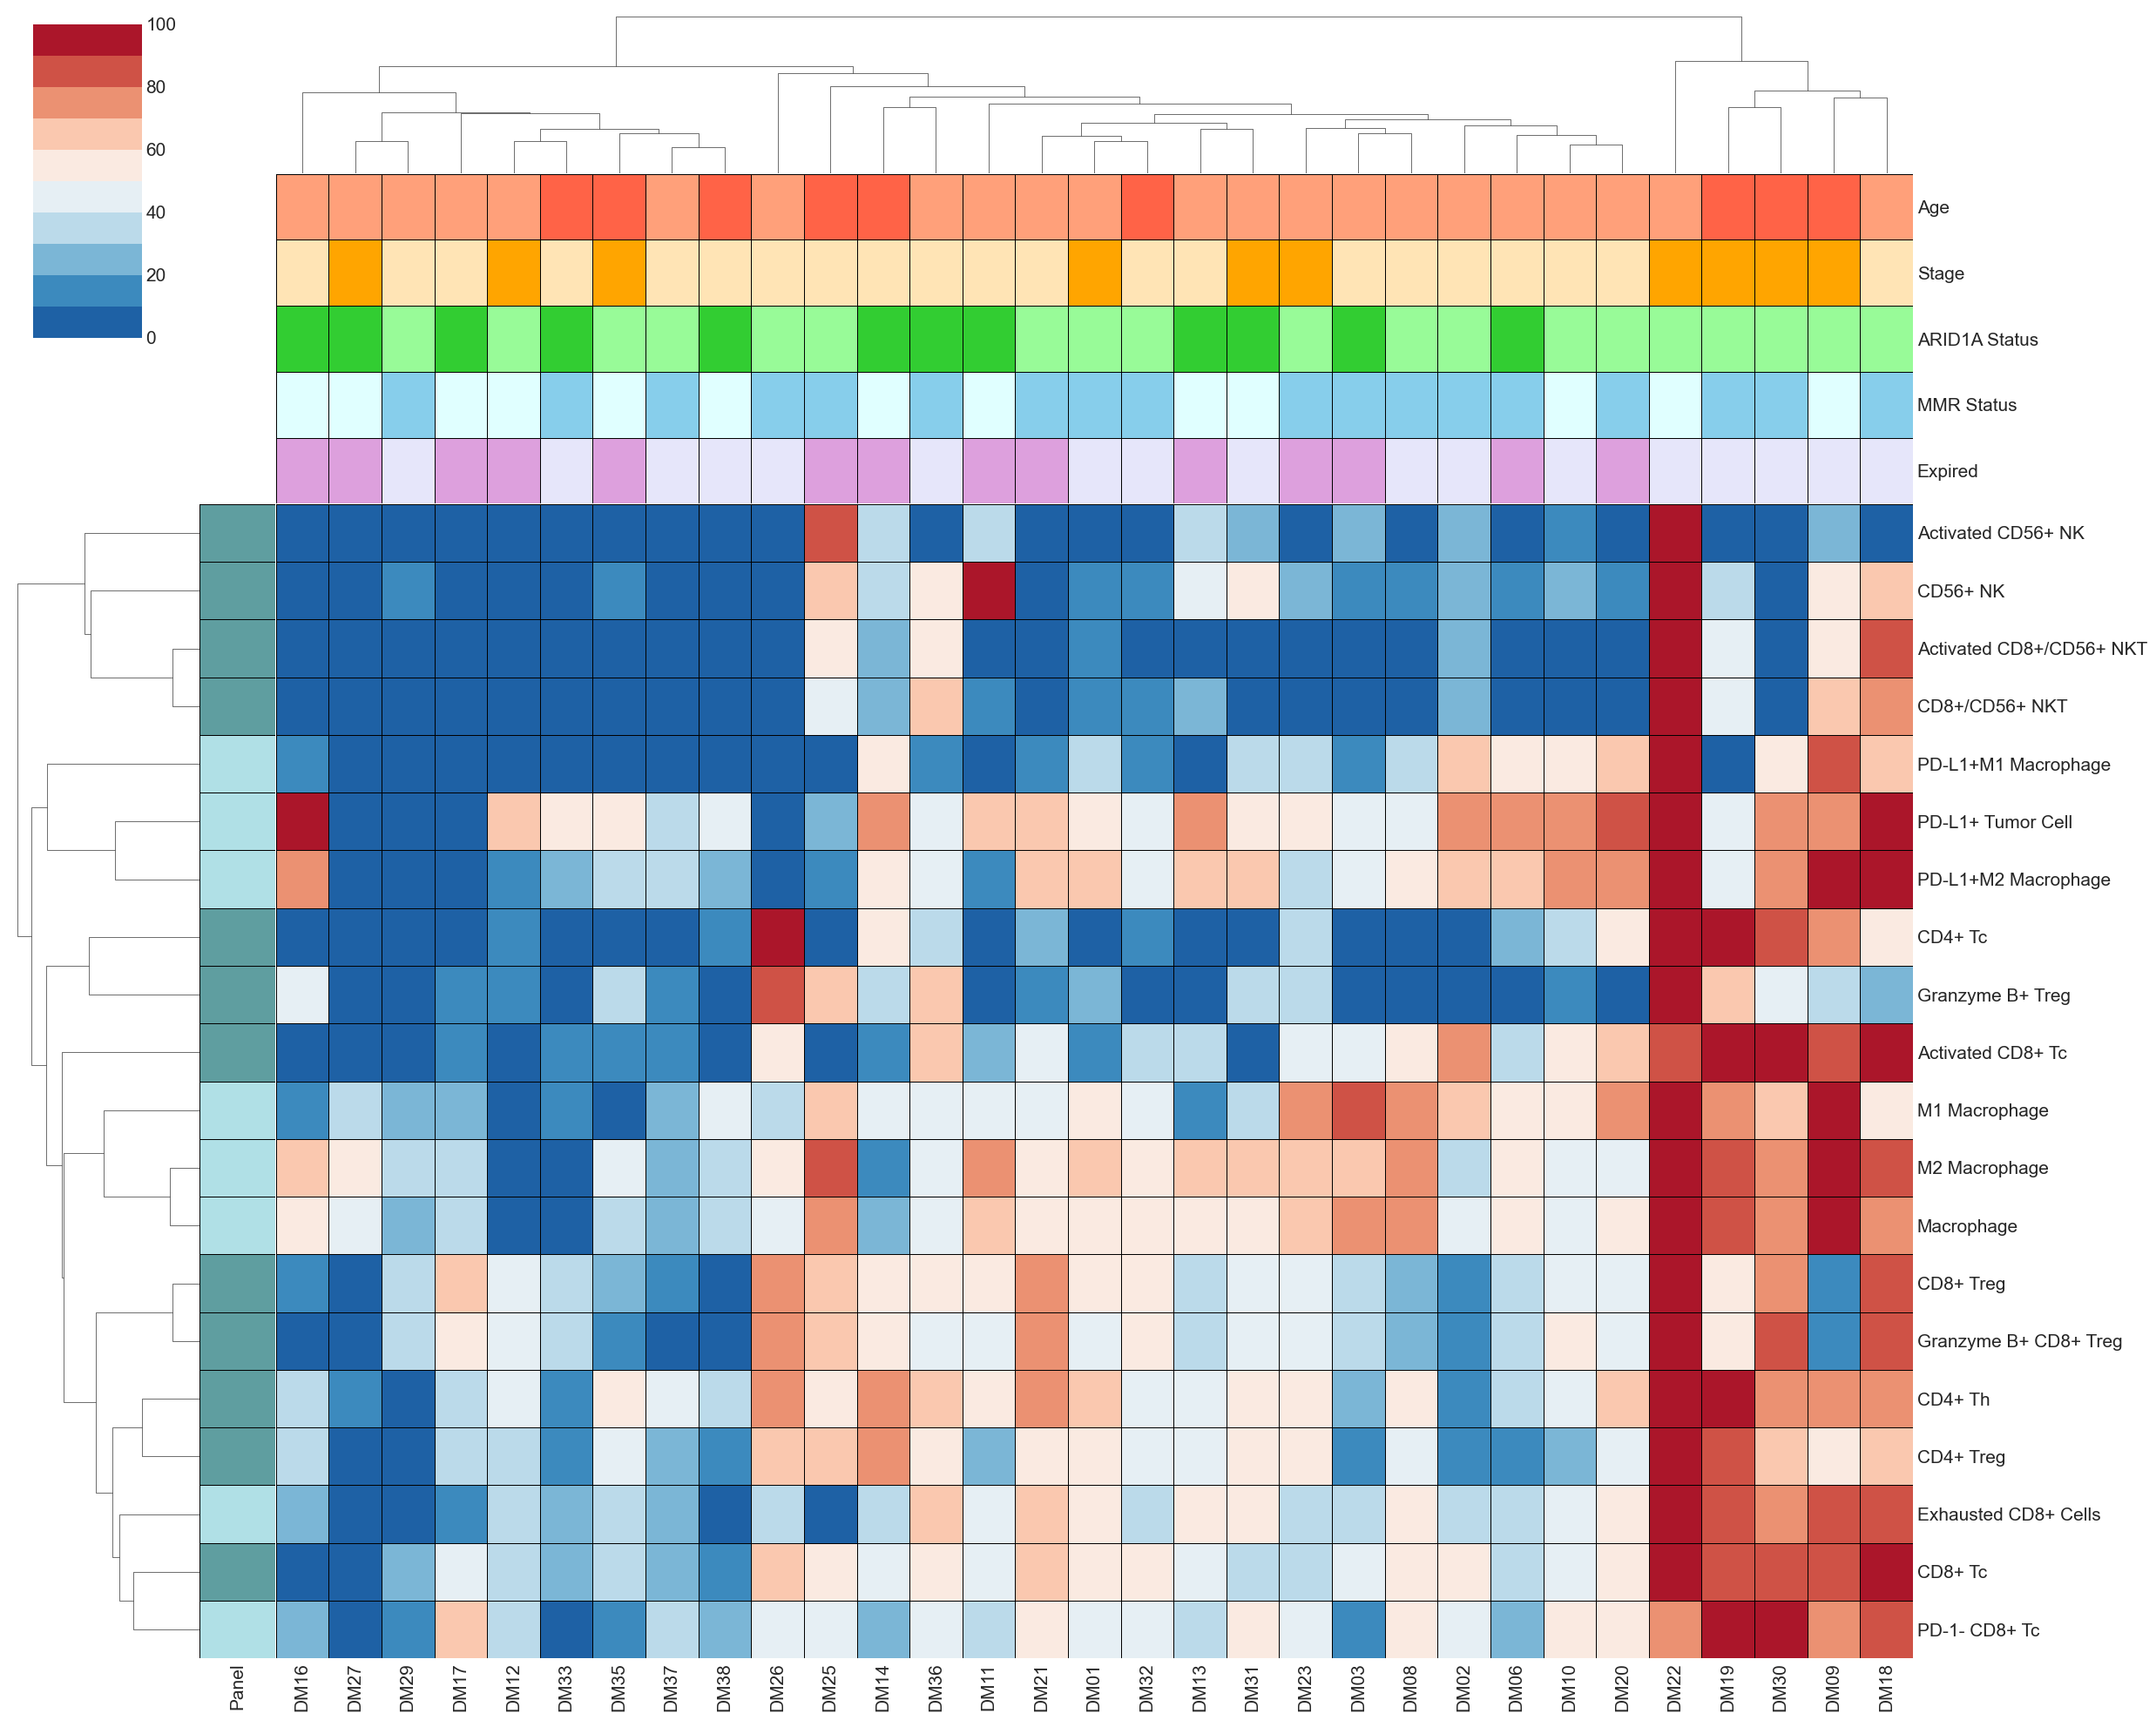

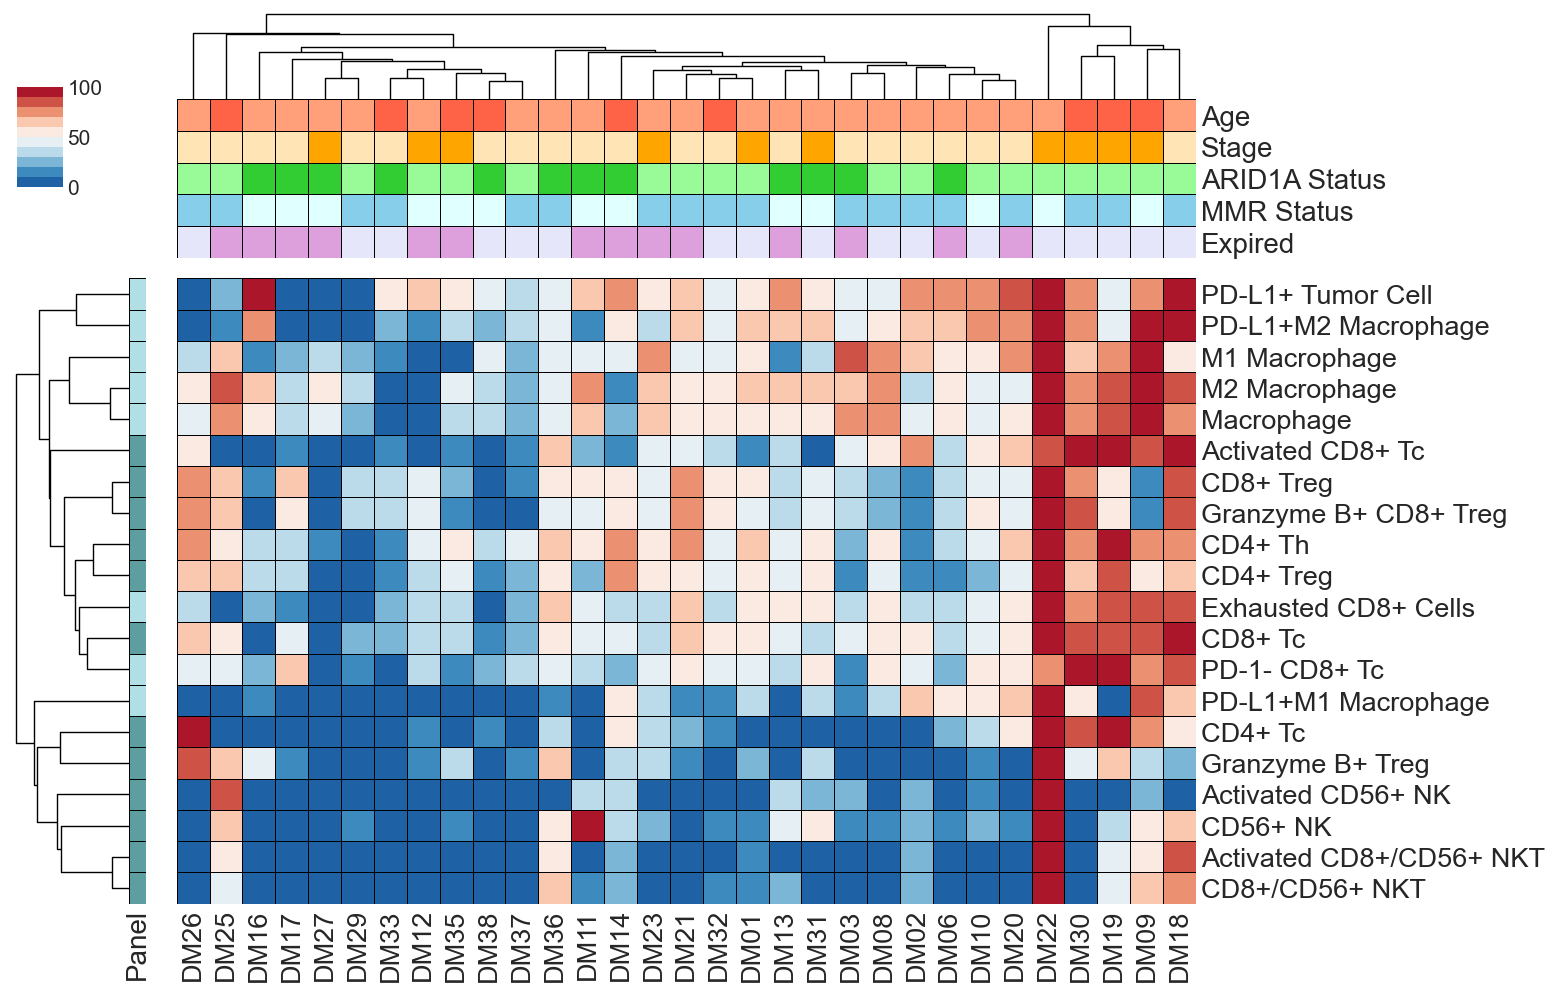

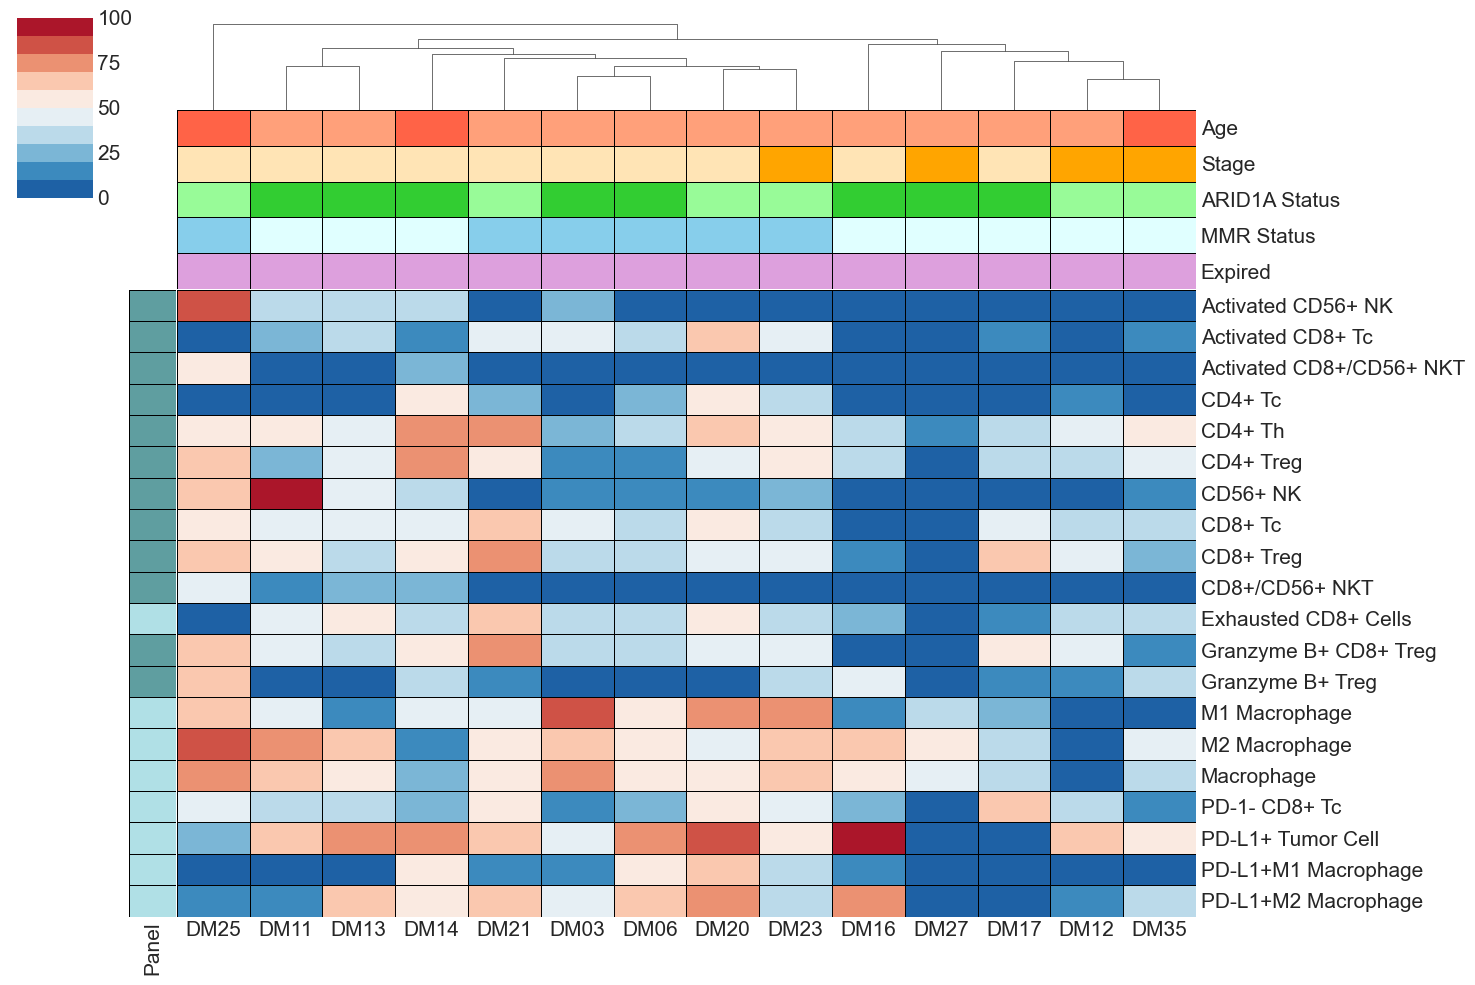

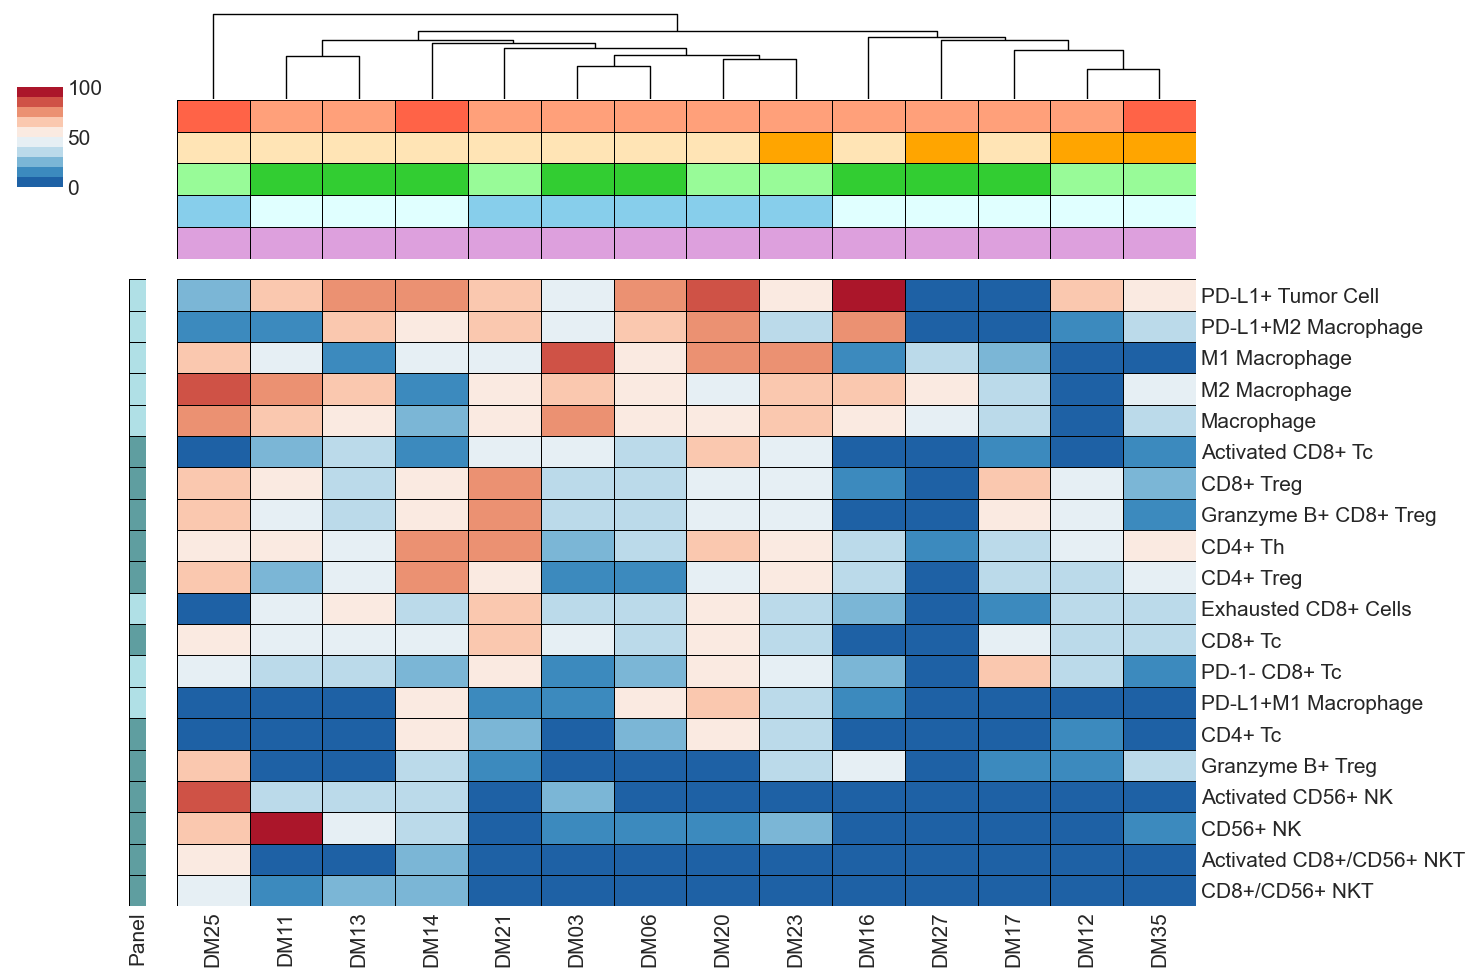

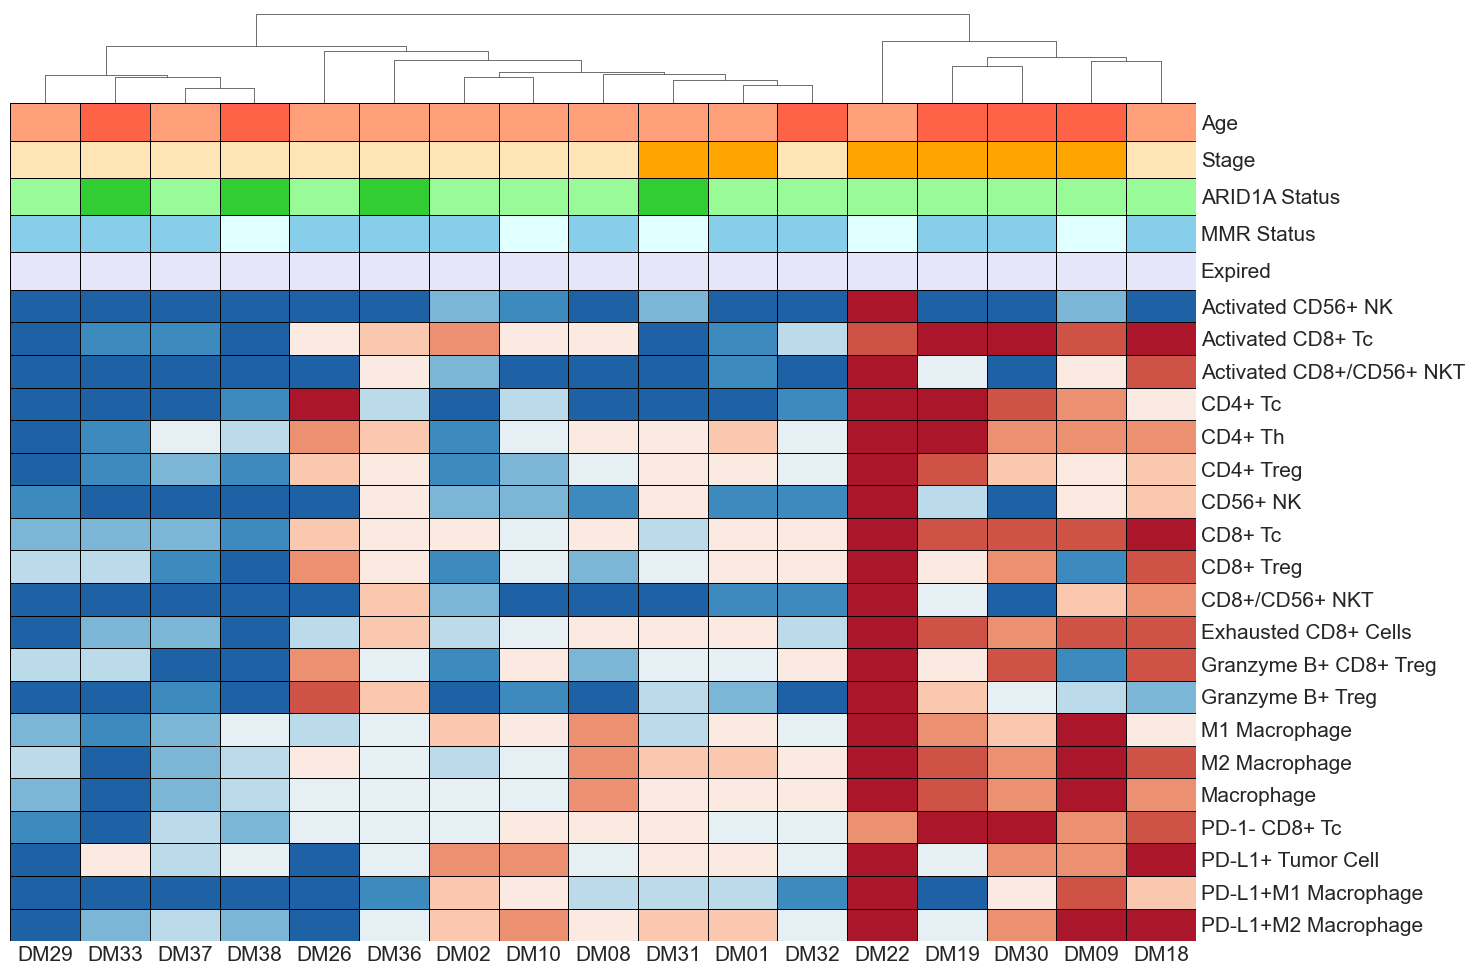

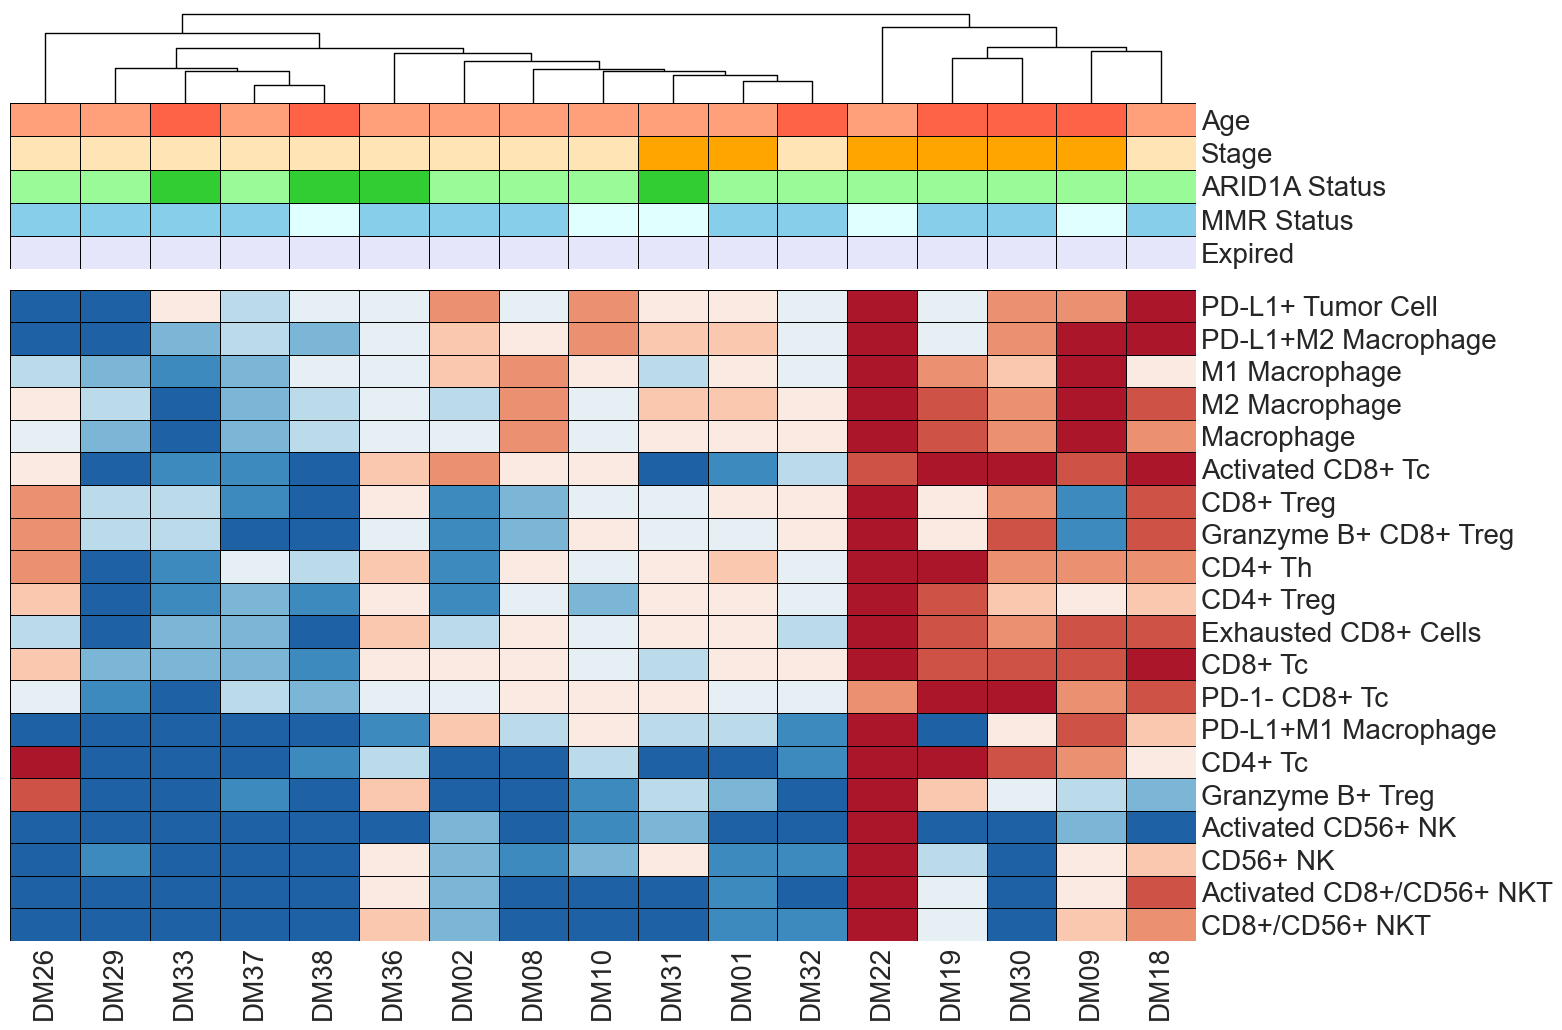

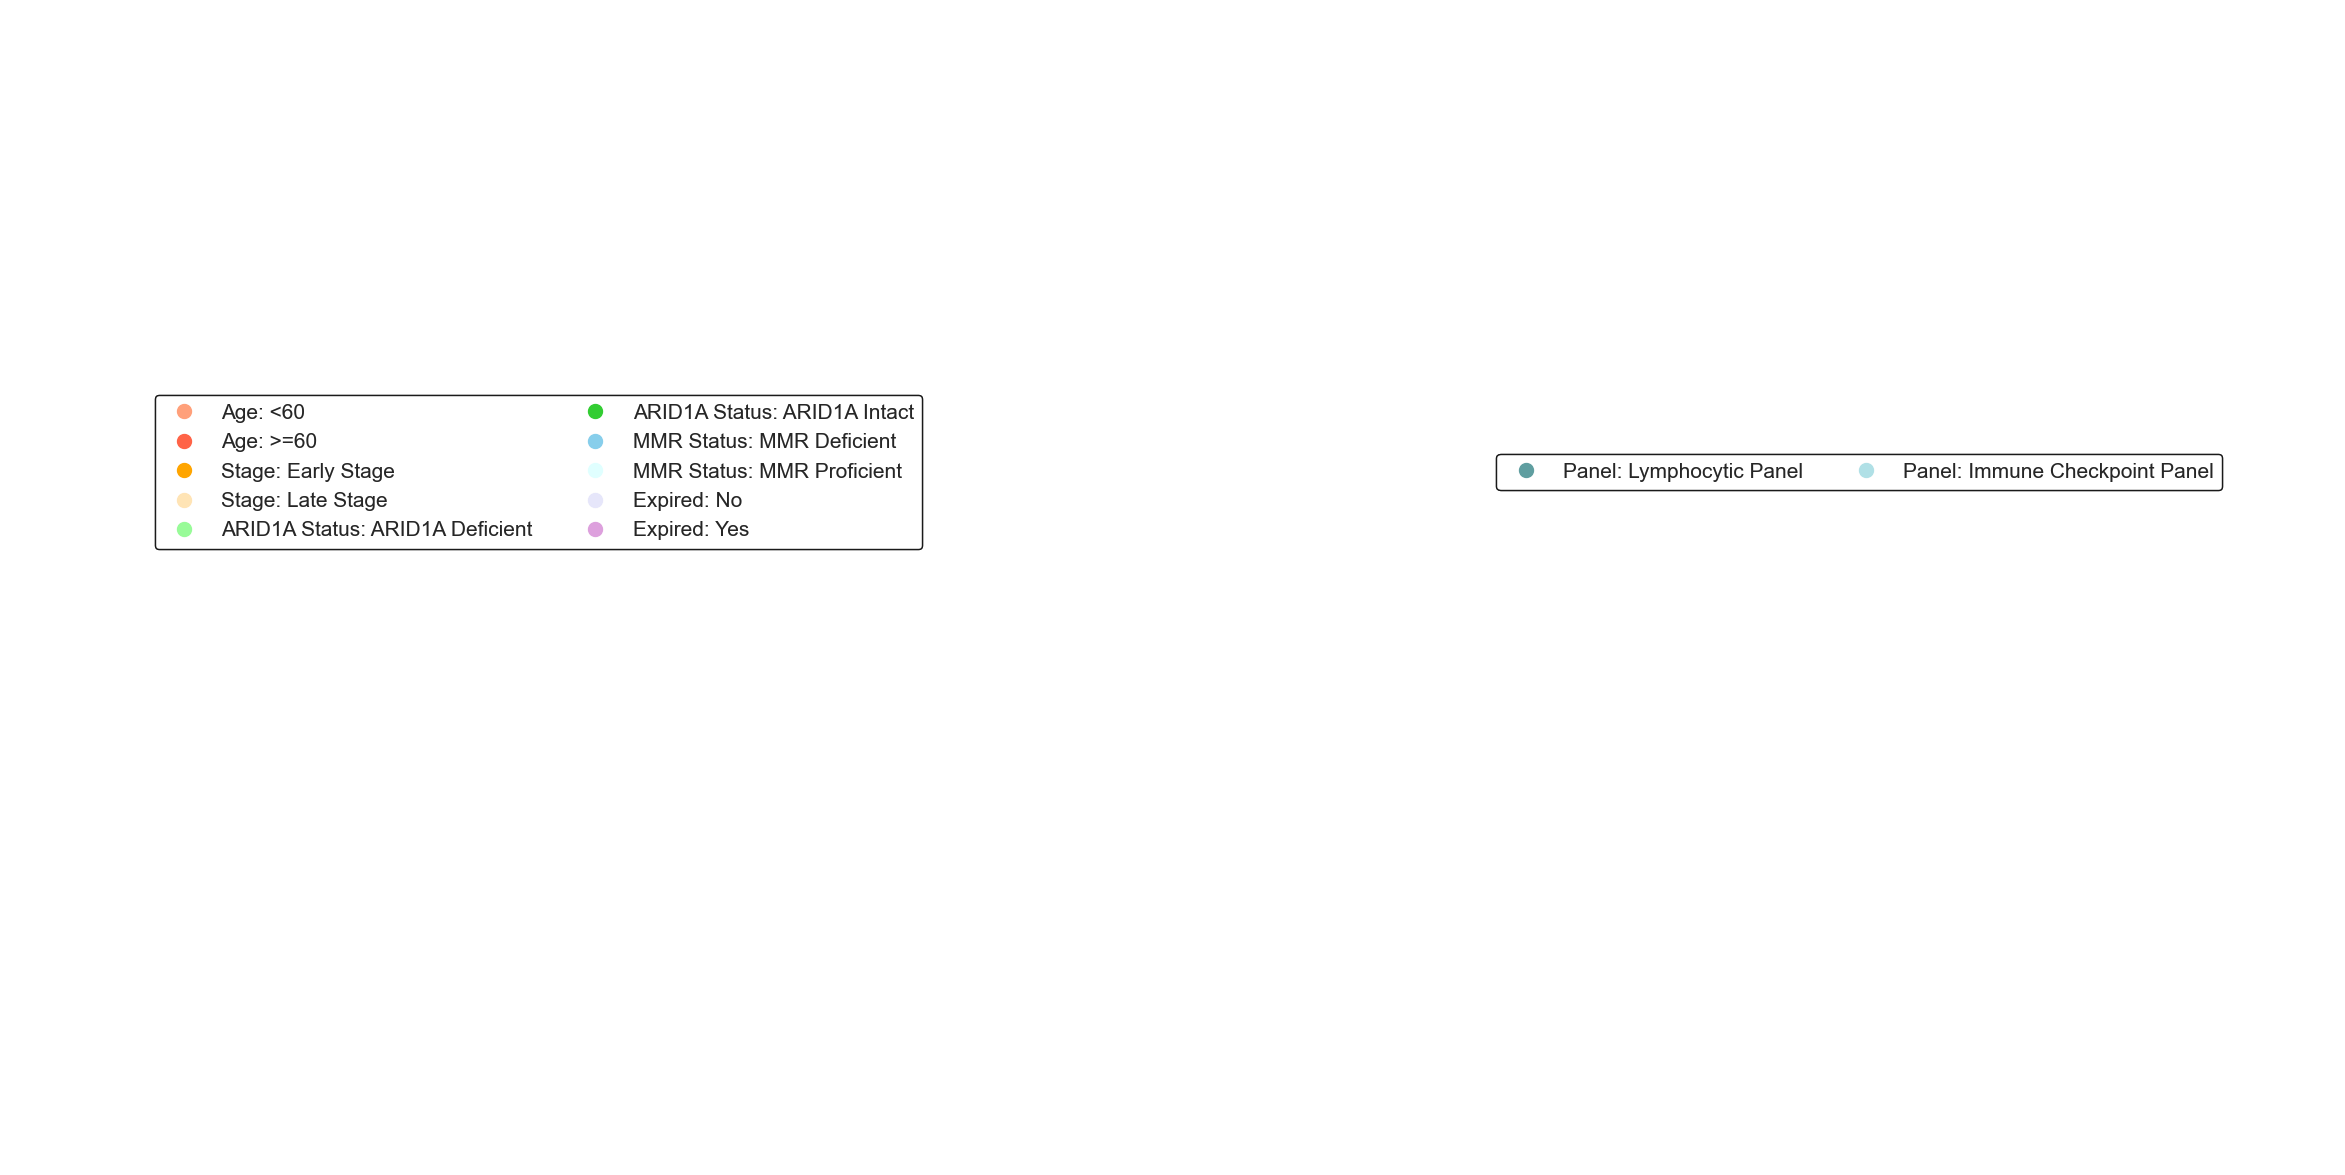

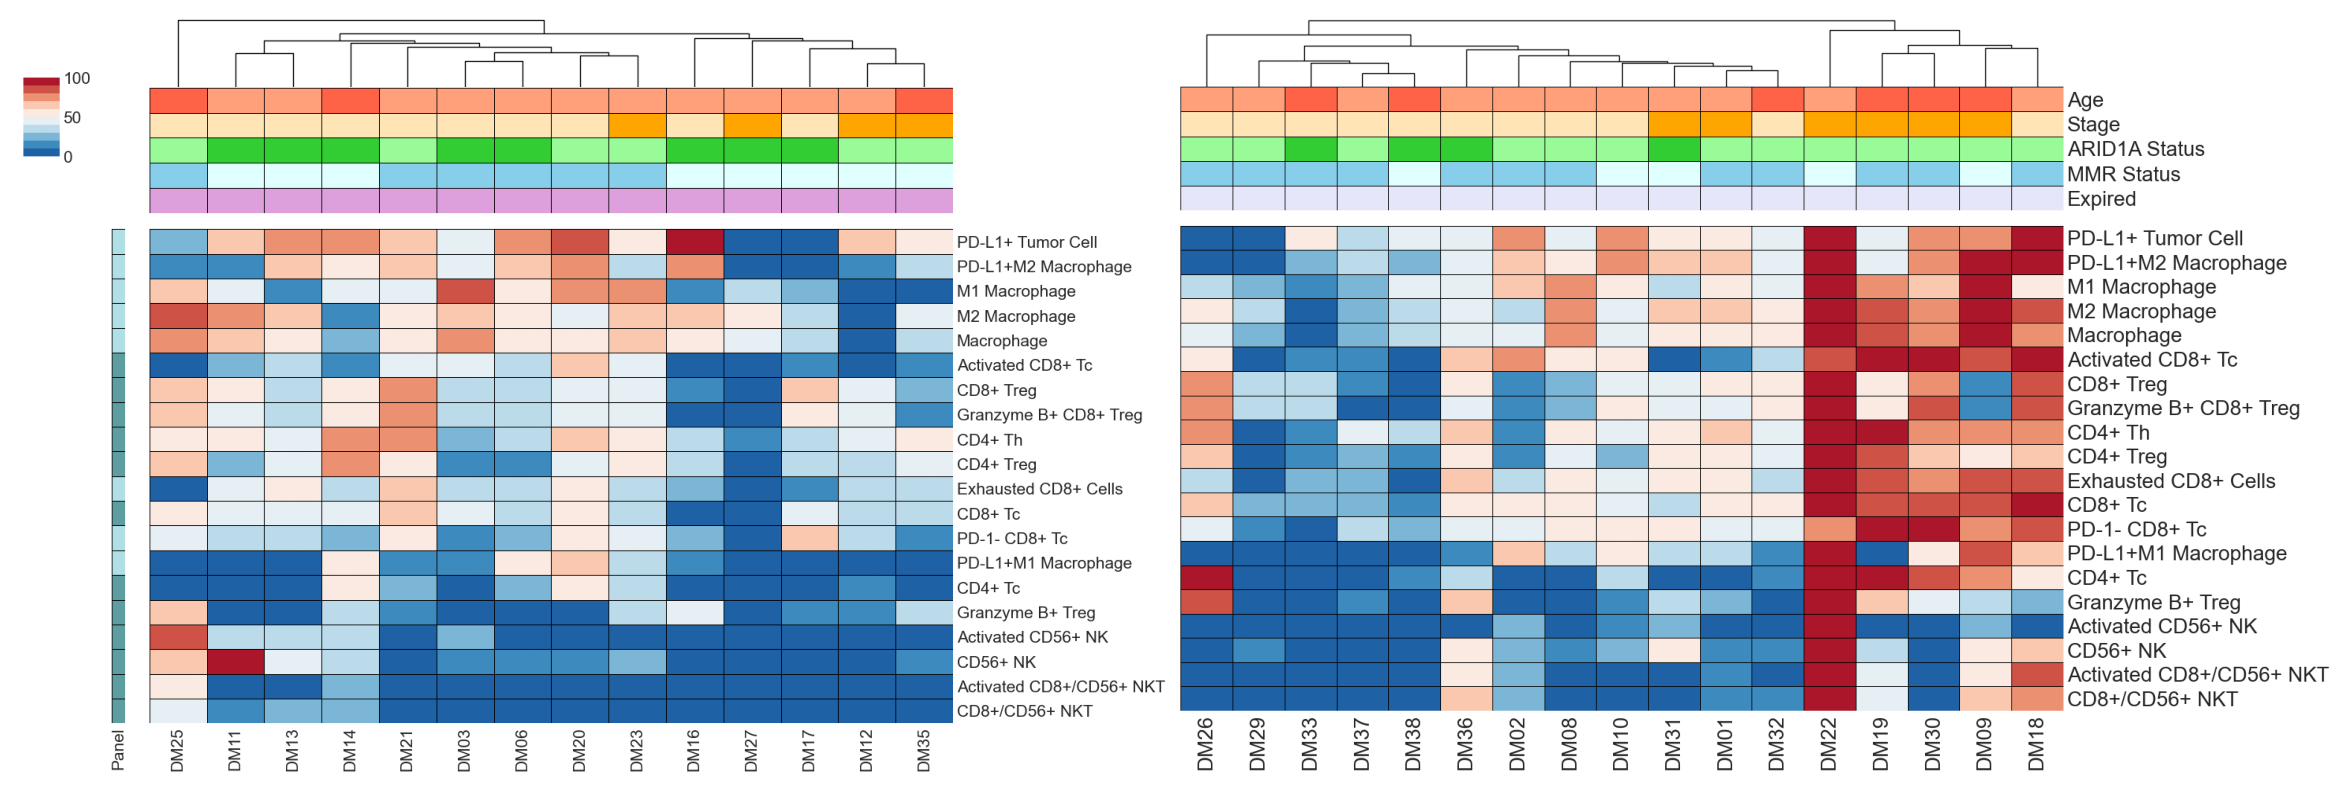

In [ ]:
'''------ data_directory: Input File Directory ------'''
def main(data_directory):
    
    ''' Clustering_data_generation '''
    metric, cname1, cname2 = clustering_data_generation(data_directory)
    print(metric)
    metric_ = np.zeros(metric.shape)
    metric_percentage_df = metric_percentage_calculation(metric_, metric, cname1, cname2)
    metric = metric_percentage_df.values  # 更新metric為轉換後的值
    print(metric_percentage_df.shape)
    
    ''' Metadata '''
    col_metadata = pd.read_excel(config.COL_METADATA ,index_col=0)
    row_metadata = pd.read_excel(config.ROW_METADATA,index_col=0)
    row_colors, col_colors, row_palette, col_palette = metadata(row_metadata, col_metadata)
    
    ''' Split data by factor '''
    (metric_factor1, cname2_factor1, col_metadata_factor1), (metric_factor2, cname2_factor2, col_metadata_factor2) = split_by_factor(metric, cname1, cname2, col_metadata)
    drawing_list = [metric_factor1, metric_factor2]
    cname2_factor_list = [cname2_factor1,cname2_factor2]
    print(cname2_factor_list)
    
    ''' Graph type '''
    save_legend_dir = f'{config.SAVE_PARENT_DIRECTORY_NORMALIZING}/legend.png'  

    '''Save whole picture'''
    save_hole_pic = f'{config.SAVE_PARENT_DIRECTORY_NORMALIZING}/whole.png'
    plotter = Plot_Clustermap()
    plotter.plot_clustermap(metric_percentage_df,row_colors, col_colors, save_hole_pic)
    
    for i in range(len(drawing_list)):
        # 直接使用已轉換的資料
        metric_percentage_df = pd.DataFrame(drawing_list[i], cname1, cname2_factor_list[i])
        # Save each clustermap to a temporary file and then read it back for displaying in subplot
        temp_save_dir = f'{config.SAVE_PARENT_DIRECTORY_NORMALIZING}/temp_{i}.png'
        if i == 0:
            plotter.plot_clustermap_left(metric_percentage_df, row_colors, col_colors, temp_save_dir)
        else:
            plotter.plot_clustermap_right(metric_percentage_df, row_colors, col_colors, temp_save_dir)


    plot_legend(row_palette, col_palette, save_legend_dir)
    
    '''Plot combined cluster'''
    ch2 = input(" Name your Plotting. Do NOT write the file type (e.g., png, jpeg, etc). Do not leave spaces.")
    print("")
    save_clustermap_dir = f'{config.SAVE_PARENT_DIRECTORY_NORMALIZING}/{ch2}.png'  
    plotter.plot_combined(os.path.join(config.SAVE_PARENT_DIRECTORY_NORMALIZING,'temp_0.png'), os.path.join(config.SAVE_PARENT_DIRECTORY_NORMALIZING,'temp_1.png'), save_clustermap_dir)


if __name__ == "__main__":
    main(config.INPUT)